In [ ]:
# Python
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_excel('Total(marriot).xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [3]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [4]:
df_day.tail()

,ds,y
553,2020-09-04,18442.08
554,2020-09-05,18112.08
555,2020-09-06,17171.28
556,2020-09-07,14864.88
557,2020-09-08,16439.76


In [5]:
df_day.drop(df_day.index[557], inplace=True)

In [6]:
df_day.tail()

,ds,y
552,2020-09-03,17807.76
553,2020-09-04,18442.08
554,2020-09-05,18112.08
555,2020-09-06,17171.28
556,2020-09-07,14864.88


In [7]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

In [8]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days
future.tail()

,ds
582,2020-10-03
583,2020-10-04
584,2020-10-05
585,2020-10-06
586,2020-10-07


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
582,2020-10-03,15580.468481,14126.173335,17097.647300
583,2020-10-04,15087.943755,13632.354653,16581.284402
584,2020-10-05,15281.969928,13810.784954,16778.560011
585,2020-10-06,15175.050156,13627.528209,16565.815900
586,2020-10-07,14976.128372,13398.637975,16410.214930


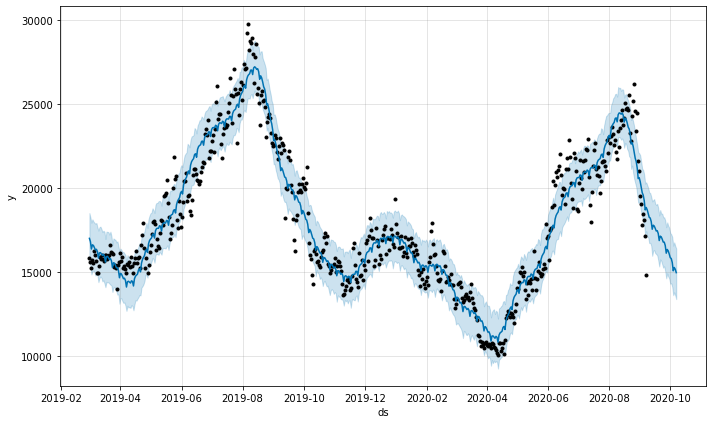

In [10]:
fig1 = m.plot(forecast)

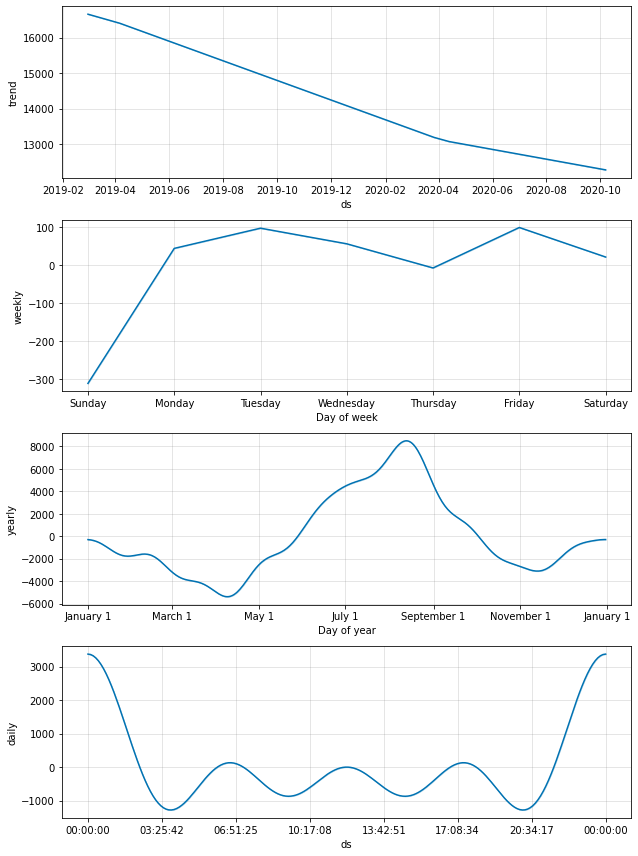

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)